<a href="https://colab.research.google.com/github/abhinandhss121/Abhinandh-s-Repo/blob/main/TextfromImgusingCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2



In [ ]:
#Read the image
im_oath = "/content/BA5D7F83-8BF3-4020-B053-CDDFDA0665E9.jpeg"
img = cv2.imread(im_oath)
print(img.shape)

(1066, 800, 3)


In [ ]:
#Resize the image
img = cv2.resize(img,(500,500))

In [ ]:
# Applying adaptive thresholding
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
 # Changed to adaptiveThreshold

In [ ]:
#Converting to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

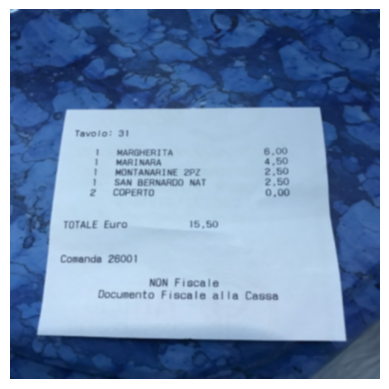

In [ ]:
#GaussianBlur
blur = cv2.GaussianBlur(img,(5,5),0)
plt.imshow(blur, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
#Edge detection
edges = cv2.Canny(blur, 20, 140)
plt.show()


In [ ]:
# Contouring
contours, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

(500, 500, 3)

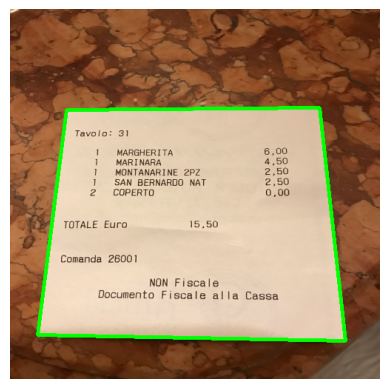

In [ ]:
doc_contour = None
for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)  # Adjusted epsilon
    approx = cv2.approxPolyDP(contour, epsilon, True)

# Allow for contours with 3, 4, or 5 vertices
    if 3 <= len(approx) <= 5:
        doc_contour = approx
        break

# Visualize the contour
if doc_contour is not None:
    cv2.drawContours(img, [doc_contour], -4, (0, 255, 0), 3)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

else:
    print("Document contour not found!")
img.shape


In [ ]:
!pip install pytesseract

In [ ]:
!sudo apt-get install tesseract-ocr
!sudo apt-get install libtesseract-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtesseract-dev is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!sudo apt-get install pyperclip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package pyperclip


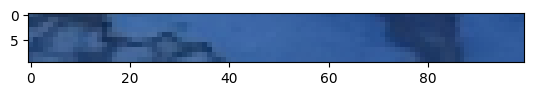

Extracted Text: cs j  —.



In [ ]:
import pytesseract
import cv2
from PIL import Image

# Assuming 'edges' is the variable containing your edge-detected grayscale image.
# Extract text from a smaller region of the image (example)
roi = img[90:100, 200:300] # Adjust coordinates to target text area
plt.imshow(roi)  # Display the region of interest
plt.show()

text = pytesseract.image_to_string(Image.fromarray(roi), lang='eng', config='--psm 6')
print("Extracted Text:", text)